In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from fedavg import fed_avg, compute_theta_star, logistic_loss

import matplotlib

# plot parameters
matplotlib.rc('font', **{'family': 'serif',
                         'serif': ['Computer Modern'],
                         'size': 16})
matplotlib.rc('text', usetex=True)
markers = ['o', '^', 'v', '*', '+', 'x']


# general parameters 
n_local_list = [1, 2, 4, 8, 16, 32]
n_agents = 10
n_runs = 10

n_features = 10
n_data = 100


# Simulation parameters
step = 0.0005
n_rounds = 500
batch_size = 1
lambda_ = 1e-4


# rng for reproducibility
rng = np.random.default_rng(seed=42)


datas = [ make_blobs(n_samples=n_data, centers=2,
                     n_features=n_features, cluster_std=10, 
                     random_state=j) for j in range(n_agents) ]
        
# compute solution
theta_star = compute_theta_star(datas, lambda_)


/home/pmangold/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


1.776798258990208
1.1841932434712477
0.8088288279989126
0.5665363175258742
0.4046684589737672
0.2931452451525751
0.2144403840345267
0.15789678862291115
0.11674731584696413
0.08652766769017224
0.06419732136949208
0.04763127943522403
0.03531377700215178
0.026146458901494155
0.01932396775092479
0.014250688433879477
0.010483486918018252
0.007691396196838782
0.005626678939831332
0.004103731480309923
0.002983518599327486
0.002161986286574708
0.0015613814866684561
0.0011237227839829404
0.000805877501712183
0.0005758464829006568
0.00040996072886410976
0.000290768242238714
0.00020544382628753945
0.00014459505862618544
0.00010136807731662193
7.07798582089067e-05
4.922120164847431e-05
3.408803644036337e-05
2.350888326053984e-05
1.6144141354326617e-05
1.103883345084757e-05
7.514993563470691e-06
5.093340504670192e-06
3.436500683714008e-06
2.308023369757118e-06
1.5429215834209476e-06
1.0265890442360519e-06
6.79778005487822e-07
4.479434922752318e-07
2.937191243015848e-07
1.916287179799209e-07
1.24386

In [34]:
def plot_logistic_loss_contour(datas, lambda_):
    num_features = datas[0][0].shape[1]  # Number of features in X
    
    num_points = 100

    theta0_vals = np.linspace(-2, 2, num_points)
    theta1_vals = np.linspace(-2, 2, num_points)
    theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)

    theta_grid = np.stack([theta0_grid.ravel(), theta1_grid.ravel()], axis=1)  # Shape: (10000, 2)

    theta_full = np.zeros((theta_grid.shape[0], num_features)) 
    theta_full[:, :2] = theta_grid

    # Compute loss for all theta values at once
    
    loss_vals_table = np.zeros((len(datas), num_points**2))
    minimums = np.zeros((len(datas), 2))
    
    for i, (X, y) in enumerate(datas):
        loss_vals_table[i,:] = np.apply_along_axis(lambda theta: logistic_loss(X, y, theta, lambda_), 1, theta_full)
        print(np.argmin(loss_vals_table[i,:]))
    
    loss_vals = loss_vals_table.mean(axis=0)
        
        
    # Reshape to match grid shape
    loss_vals = loss_vals.reshape(theta0_grid.shape)

    # Plot level sets (vectorized version)
    plt.figure(figsize=(8, 6))
    contour = plt.contour(theta0_grid, theta1_grid, loss_vals, levels=20, colors="black")
    plt.clabel(contour, inline=True, fontsize=8)  # Label contour lines
    plt.xlabel(r"$\theta_0$")
    plt.ylabel(r"$\theta_1$")
    plt.title("Level Sets of Regularized Logistic Loss (Vectorized)")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

5054
5148
4951
4945
4852
5247
5249
5252
5150
5246


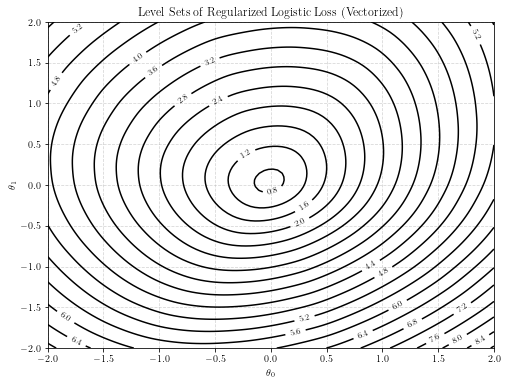

In [35]:
plot_logistic_loss_contour(datas, lambda_)

In [ ]:
# create figure
fig, ax = plt.subplots(figsize=(4,3))

    for i, n_local in enumerate(n_local_list):
        # run algorithm
        thetas_fedavg = fed_avg(clients_data=datas, theta=np.zeros(n_features),
                                step=step, lambda_=lambda_,
                                n_local=n_local, n_rounds=n_rounds)
    
        
        # plot result
        plt.plot(np.linalg.norm(thetas_fedavg - theta_star, axis=1)**2,
                 label="H="+str(n_local), marker=markers[i],
                 markevery=500//10)

    plt.ylim([1e-9, None])
    plt.yscale("log")

    plt.xlabel("Communications")
    plt.ylabel("Mean Squared Error")
    plt.savefig("local_training_" + data_type + ".pdf", bbox_inches="tight")


fig, ax = plt.subplots(figsize=(2,3))
lines = []
for i, n_local in enumerate(n_local_list):
    line, = ax.plot([1], [4], label="H="+str(n_local), marker=markers[i])
    lines.append(line)
labels = [line.get_label() for line in lines]

fig2, ax2 = plt.subplots(figsize=(2,3))
ax2.axis('off')
legend = ax2.legend(lines, labels, loc='center')
plt.savefig("legend.pdf", bbox_inches="tight")

4.3697482954538565
2.6001065907083665
1.7862944326402805
1.3421405255382228
1.0630293253209815
0.8713099677549684
0.731528360898437
0.6251780168000972
0.5416311153480078
0.4743375313331676
0.4190356375579575
0.3728316875804418
0.3336917016600467
0.3001446871968381
0.2711010235326422
0.24573690380405763
0.22341834011821257
0.20364975571938188
0.18603835177995826
0.17026887938629767
0.15608544347163855
0.1432781615115886
0.13167323770514203
0.12112548066981182
0.11151259564704494
0.1027307828348314
0.0946913088719738
0.08731781147945777
0.08054416211416641
0.07431275736136908
0.06857314265575579
0.06328089573931532
0.05839671471071016
0.05388566842398945
0.04971657662322959
0.04586149444478662
0.04229528141305323
0.03899523925282502
0.03594080607040076
0.03311329695655454
0.03049568301433167
0.02807240234444683
0.025829197728747144
0.023752976711433053
0.0218316905440525
0.020054229076037933
0.018410329170111362
0.016890494626028582
0.015485925926183183
0.014188458387412305
0.01299050752

TypeError: fed_avg() got an unexpected keyword argument 'noise_scale'

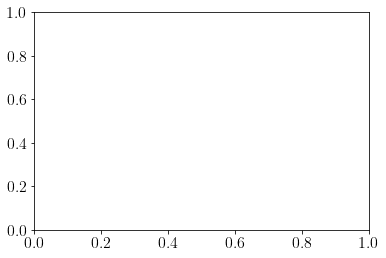

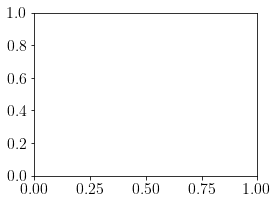

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from fedavg import fed_avg, compute_theta_star

import matplotlib

# plot parameters
matplotlib.rc('font', **{'family': 'serif',
                         'serif': ['Computer Modern'],
                         'size': 16})
matplotlib.rc('text', usetex=True)
markers = ['o', '^', 'v', '*', '+', 'x']


# general parameters 
n_local_list = [1, 2, 4, 8, 16, 32]
n_agents = 10
n_runs = 10

n_features = 10
n_data = 100


# Simulation parameters
step = 0.0005
n_rounds = 500
batch_size = 1
lambda_ = 1e-4


# rng for reproducibility
rng = np.random.default_rng(seed=42)

# generate data
for noise_scale in [0, 1]:
    fig, ax = plt.subplots()
    for data_type in {"homogeneous", "heterogeneous"}:
        if data_type == "homogeneous":
            datas = [ make_blobs(n_samples=n_data, centers=2,
                                 n_features=n_features, cluster_std=10,
                                 random_state=42)
                      for j in range(n_agents) ]
        
        else:
            datas = [ make_blobs(n_samples=n_data, centers=2,
                                 n_features=n_features, cluster_std=10,
                                 random_state=j)
                      for j in range(n_agents) ]
        
        # compute solution
        theta_star = compute_theta_star(datas, lambda_)
    
    
        # create figure
        fig, ax = plt.subplots(figsize=(4,3))

        for i, n_local in enumerate(n_local_list):
            # run algorithm
            thetas_fedavg = fed_avg(clients_data=datas, theta=np.zeros(n_features),
                                    step=step, lambda_=lambda_,
                                    noise_scale=noise_scale,
                                    n_local=n_local, n_rounds=n_rounds)
    
        
            # plot result
            plt.plot(np.linalg.norm(thetas_fedavg - theta_star, axis=1)**2,
                     label="H="+str(n_local), marker=markers[i],
                     markevery=500//10)

        if noise_scale <= 0:
            plt.ylim([1e-9, None])
        else:
            plt.ylim([1e-6, None])
        plt.yscale("log")
        
        plt.xlabel("Nombre de Communications")
        plt.ylabel("Erreur Quadratique")
        plt.savefig("local_training_" + data_type + "_" + str(noise_scale) + ".pdf", bbox_inches="tight")


fig, ax = plt.subplots(figsize=(2,3))
lines = []
for i, n_local in enumerate(n_local_list):
    line, = ax.plot([1], [4], label="H="+str(n_local), marker=markers[i])
    lines.append(line)
labels = [line.get_label() for line in lines]

fig2, ax2 = plt.subplots(figsize=(2,3))
ax2.axis('off')
legend = ax2.legend(lines, labels, loc='center')
plt.savefig("legend.pdf", bbox_inches="tight")

